In [1]:
from __future__ import print_function
__author__= 'yxz'

In [2]:
import os
import sys
import numpy as np
import pylab as pl


import json
import os
s = json.load( open("images/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


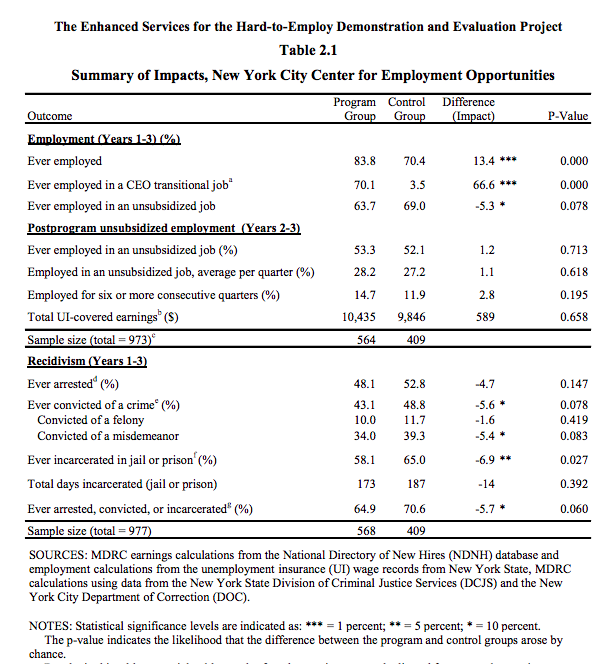

In [3]:
Image(filename='images/NYCReentryprogram.png')

# NULL HYPOTHESIS: 

The percentage of former prisoners employed **in an unsubsidized job** after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

$p_0$ = 0.69

$P_1$ = 0.637

$H_0: P_0 - P_1$ >   0
    
$H_a: P_0 - P_1 \leq$ 0    
    
$\alpha$ = 0.05  

## Z test

In [4]:
P_0=69.0*0.01
P_1=63.7*0.01

n_0=409
n_1=564

Nt_0=P_0*n_0
Nt_1=P_1*n_1

In [5]:
# Pooled Sample Proportion
psp=(P_0*n_0+P_1*n_1)/(n_1+n_0)

In [6]:
# Standard Error
SE= lambda p, n1, n2: np.sqrt(psp*(1-psp)*(1/float(n1)+1/float(n2)))

se=SE(P_0,n_0,n_1)

In [7]:
# z score
zscore = lambda p0, p1, s : (p0-p1)/s
z_3y = zscore(P_1, P_0, se)
print(z_3y)

-1.72181479644


In [8]:
# P value
p = 0.03883
alpha = 0.05
def report_result(p,a):
    print('Is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a))
   
    print('{0}, the Null hypothesis is {1}'.format( 'Yes' if p<a  else 'No','rejected'if p<a else'not rejected'))

    
report_result(p,alpha)

Is the p value 0.04 smaller than the critical value 0.05? 
Yes, the Null hypothesis is rejected


## Chi-Square test

|employed in subsadized job |     employed   | not employes   |                   
|---------------------------|----------------|------------------|---------------------------|
| test sample               | $63.7*5.64$    | $36.3*5.64$      | 564                       |
| control sample            | $69.0*4.09$    | $31.0*4.09$      | 409                       |
|                           |                |                  |                           |
| total                     | 641.478        |  331.522         | 973         |

In [3]:
Ntot = 973
expected = 564*409*641.478*331.522
sample_values = [[63.7*5.64,36.3*5.64],[69.0*4.09,31.0*4.09]]
 
chisqstat= lambda N, values, expect : N*((values[0][0]*values[1][1]-values[0][1]*values[1][0])**2)/(expect)

print chisqstat(Ntot,  sample_values, expected)


2.96464619325


2.96 is smaller than 3.84, it means that p value is above 0.05, we fail to reject the null hypothesis. That there is no statistically significant difference in the proportion of job enrollment